In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\aakan\\Downloads\\')


In [9]:
df=pd.read_csv('Fraud.csv')
print(df.shape)

#Checking the number of fraud and not fraud transactions 
print('Fraud:',len(df[df.isFraud == 1]))
print('Not fraud:',len(df[df.isFraud == 0]))
#The data is quite unbalanced as the number of frauds are just 0.001% of the total transactions happening

(6362620, 11)
Fraud: 8213
Not fraud: 6354407


In [10]:
# Handling unbalanced data by downsampling

#Downsampling the notfraud cases as they are very much when compared to that of fraud .
from sklearn.utils import resample
df_notfraud = df[df['isFraud']==0]
df_fraud = df[df['isFraud']==1]
# downsampling the notfraud class  
notfraud_downsampled = resample(df_notfraud, 
                                 replace=True,    
                                 n_samples= 82130) # considering only 82130 so that the fraud values become 10% of the total value 


In [11]:
# Combining
df_new = pd.concat([df_fraud, notfraud_downsampled])
sampled_df=df_new.reset_index()
sampled_df=sampled_df.drop(['index'],axis=1)
sampled_df
print(sampled_df.info())

# Checking for missing values, outliers and multi-collinearity.  
df.isnull().sum()

# No missing values , now checking for outliers using z-test
columns= ['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
z_scores = np.abs((sampled_df[columns] - sampled_df[columns].mean()) / sampled_df[columns].std())
outliers = (z_scores> 3).any(axis=1)
index=np.where(outliers)
#Dropped outliers
sampled_df=sampled_df.drop(index[0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90343 entries, 0 to 90342
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            90343 non-null  int64  
 1   type            90343 non-null  object 
 2   amount          90343 non-null  float64
 3   nameOrig        90343 non-null  object 
 4   oldbalanceOrg   90343 non-null  float64
 5   newbalanceOrig  90343 non-null  float64
 6   nameDest        90343 non-null  object 
 7   oldbalanceDest  90343 non-null  float64
 8   newbalanceDest  90343 non-null  float64
 9   isFraud         90343 non-null  int64  
 10  isFlaggedFraud  90343 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 7.6+ MB
None


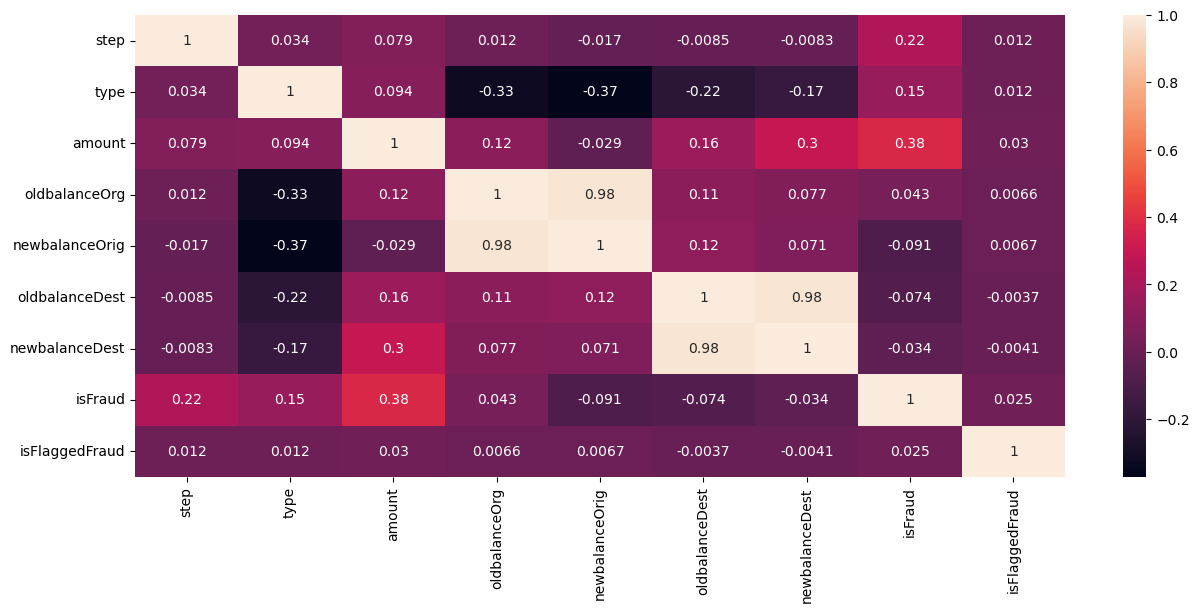

In [12]:
#Converting type column values into numerical vlaues
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sampled_df['type']=le.fit_transform(sampled_df['type'])
sampled_df

#Dropping string values 
sampled_df=sampled_df.drop(['nameOrig','nameDest'],axis=1)
sampled_df

#Checking for correlation after downsampling 
plt.figure(figsize=(15,6))
sns.heatmap(sampled_df.corr(),annot=True)
plt.show()

In [13]:
x=pd.concat([sampled_df.iloc[:,:-2],sampled_df.iloc[:,-1]],axis=1)
print(x)
y=sampled_df.iloc[:,-2]
print(y)

       step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     4     181.00         181.00            0.00            0.00   
1         1     1     181.00         181.00            0.00        21182.00   
2         1     4    2806.00        2806.00            0.00            0.00   
3         1     1    2806.00        2806.00            0.00        26202.00   
4         1     4   20128.00       20128.00            0.00            0.00   
...     ...   ...        ...            ...             ...             ...   
90338   546     3   13570.66       21576.00         8005.34            0.00   
90339   380     4  894944.83           0.00            0.00      1223409.62   
90340   328     3   23775.13      574556.00       550780.87            0.00   
90341    18     1    6324.69       93882.72        87558.03       147683.03   
90342   547     1   17215.60           0.00            0.00      3148593.55   

       newbalanceDest  isFlaggedFraud  
0          

In [15]:
#Performing train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

#Applying logistic regression to check for accuracy and precision

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)
print('Logistic Regression accuracy and precision:')
print ('Test data:',accuracy_score (y_test,y_pred_test),'\t',precision_score(y_test, y_pred_test))
print ('Train data:',accuracy_score (y_train,y_pred_train),'\t',precision_score(y_test, y_pred_test))

Logistic Regression accuracy and precision:
Test data: 0.9764692177762246 	 0.9245439469320066
Train data: 0.978171916182488 	 0.9245439469320066
